In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')        

In [2]:
data = pd.read_csv('Advertising.csv')

In [4]:
data.shape

(200, 4)

In [3]:
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
data.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [6]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


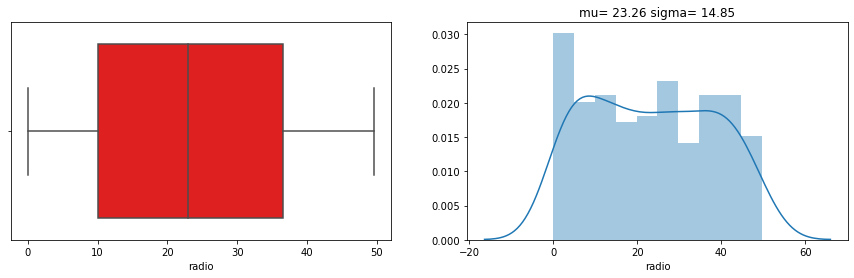

In [54]:
fig, ax =plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
sns.boxplot(x='radio',data=data, color='red', ax=ax[0])
sns.distplot(data['radio'], bins=10, ax=ax[1])
plt.title('mu= {0:.2f} sigma= {1:.2f}'.format(data['radio'].mean(),data['radio'].std()))
fig.show()

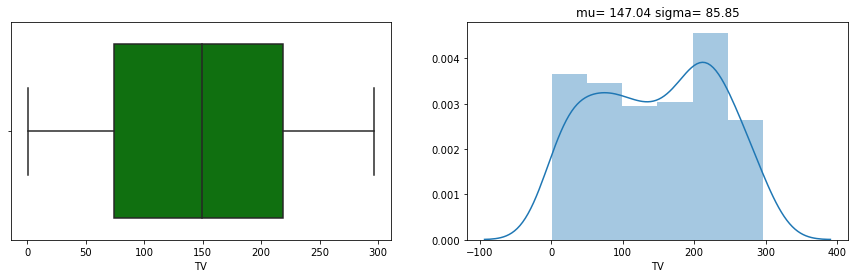

In [50]:
fig, ax =plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
sns.boxplot(x='TV',data=data, color='green', ax=ax[0])
sns.distplot(data['TV'], ax=ax[1])
plt.title('mu= {0:.2f} sigma= {1:.2f}'.format(data['TV'].mean(),data['TV'].std()))
fig.show()

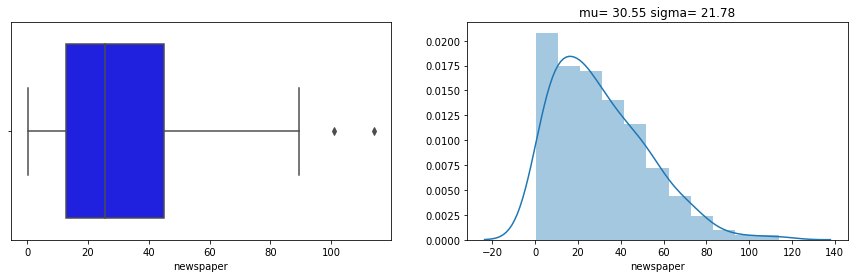

In [55]:
fig, ax =plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
sns.boxplot(x='newspaper',data=data, color='blue', ax=ax[0])
sns.distplot(data['newspaper'], ax=ax[1])
plt.title('mu= {0:.2f} sigma= {1:.2f}'.format(data['newspaper'].mean(),data['newspaper'].std()))
fig.show()

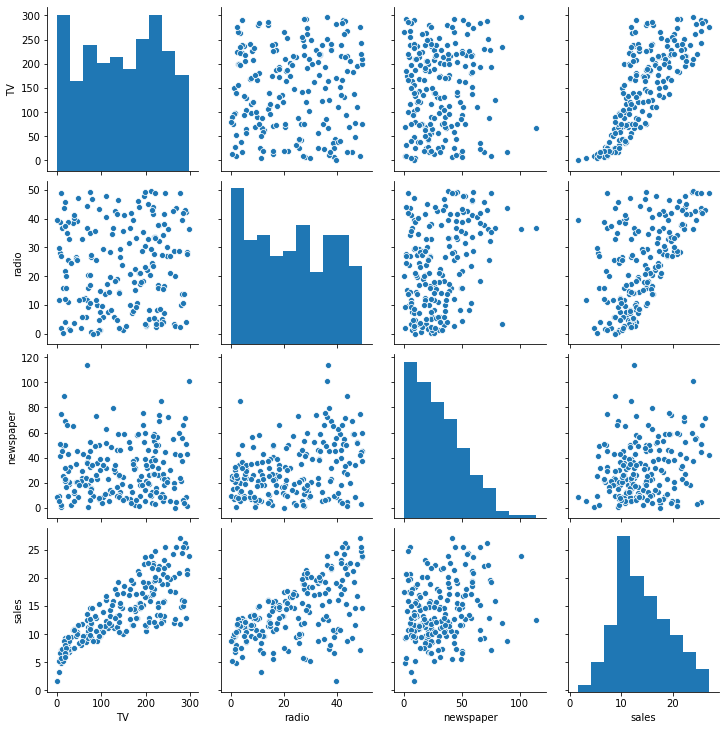

In [11]:
sns.pairplot(data)

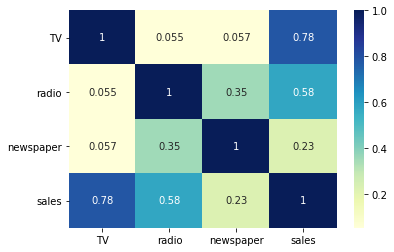

In [12]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

In [13]:
data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [87]:
x = data.drop('sales', axis=1).values
y = data['sales']

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression,ElasticNet,Lasso,Ridge

In [16]:
def report(y_test, y_pred):
    print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
    print('R Squared Error:', r2_score(y_test, y_pred))  

In [88]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [102]:
model = LinearRegression()
model.fit(X_train,y_train) #[:,0].reshape(-1,1)
y_pred = model.predict(X_train) #[:,0].reshape(-1,1)
report(y_train, y_pred)

Mean Absolute Error: 1.3288502460998393
Mean Squared Error: 3.016830607659677
Root Mean Squared Error: 1.736902590147092
R Squared Error: 0.8959372632325174


In [103]:
df = pd.DataFrame({'y_train':y_train,'y_pred':y_pred})
df.head()

,y_train,y_pred
108,5.3,3.659216
107,8.7,7.256126
189,6.7,6.004816
14,19.0,18.461698
56,5.5,8.374066


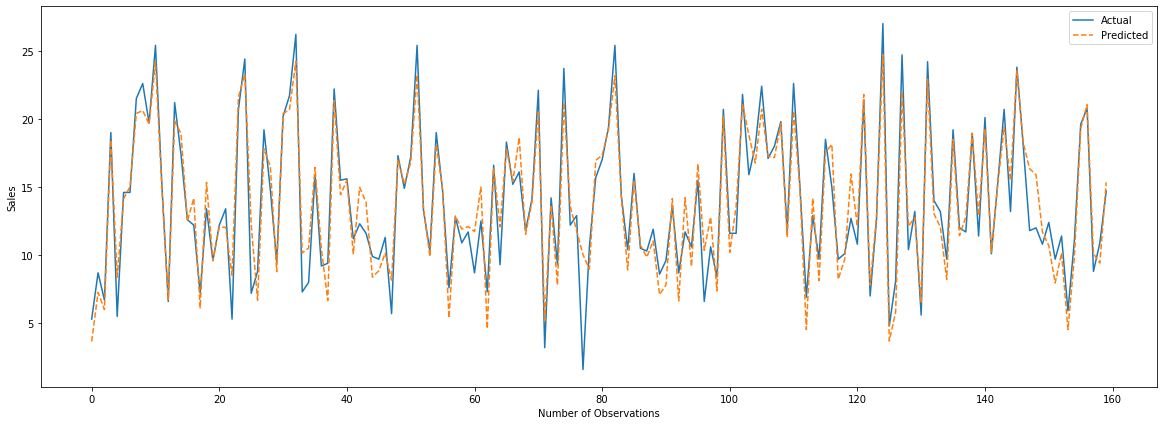

Score :  0.8959372632325174


In [114]:
plt.figure(figsize=(20, 7))
plt.plot([x for x in range(0,len(y_train))], y_train,label='Actual')
plt.plot([x for x in range(0,len(y_train))], y_pred, linestyle='--' ,label='Predicted')
plt.xlabel('Number of Observations')
plt.ylabel('Sales')
plt.legend()
plt.show()
print('Score : ',model.score(X_train, y_train))